In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=300, noise=0.1)

In [4]:
X, y

(array([[ 8.80847190e-01,  2.01390233e-01],
        [ 1.32508243e+00, -8.91199968e-02],
        [ 9.58404530e-03,  1.21658071e-01],
        [ 5.18400387e-01,  6.91955754e-01],
        [-6.01408347e-01,  8.53374964e-01],
        [ 3.84364221e-01, -1.74786990e-01],
        [ 1.42543066e+00, -2.55646467e-01],
        [ 7.44632426e-01,  8.96297940e-01],
        [-5.75830961e-01,  9.01137188e-01],
        [-5.79201492e-01,  8.24547194e-01],
        [ 7.74851914e-01, -5.82644468e-01],
        [ 9.59685883e-01,  1.47648135e-01],
        [ 1.27818440e-01, -2.58021802e-01],
        [ 1.09665120e+00, -5.12690591e-01],
        [ 7.28533797e-01, -3.66163160e-01],
        [ 3.19236213e-01, -1.03988412e-01],
        [ 4.40809274e-01,  9.29622624e-01],
        [ 1.56186833e-01,  1.02425794e+00],
        [ 3.58738942e-01, -2.62251458e-01],
        [-9.61252290e-01, -5.55729976e-02],
        [ 1.71210577e+00, -2.14615926e-01],
        [-1.11279300e-02,  8.40253181e-01],
        [ 7.35922734e-01, -4.305

In [5]:
X_outliers = np.random.uniform(low=-3, high=3, size=(20, 2))
X = np.vstack((X, X_outliers))

In [6]:
X

array([[ 8.80847190e-01,  2.01390233e-01],
       [ 1.32508243e+00, -8.91199968e-02],
       [ 9.58404530e-03,  1.21658071e-01],
       [ 5.18400387e-01,  6.91955754e-01],
       [-6.01408347e-01,  8.53374964e-01],
       [ 3.84364221e-01, -1.74786990e-01],
       [ 1.42543066e+00, -2.55646467e-01],
       [ 7.44632426e-01,  8.96297940e-01],
       [-5.75830961e-01,  9.01137188e-01],
       [-5.79201492e-01,  8.24547194e-01],
       [ 7.74851914e-01, -5.82644468e-01],
       [ 9.59685883e-01,  1.47648135e-01],
       [ 1.27818440e-01, -2.58021802e-01],
       [ 1.09665120e+00, -5.12690591e-01],
       [ 7.28533797e-01, -3.66163160e-01],
       [ 3.19236213e-01, -1.03988412e-01],
       [ 4.40809274e-01,  9.29622624e-01],
       [ 1.56186833e-01,  1.02425794e+00],
       [ 3.58738942e-01, -2.62251458e-01],
       [-9.61252290e-01, -5.55729976e-02],
       [ 1.71210577e+00, -2.14615926e-01],
       [-1.11279300e-02,  8.40253181e-01],
       [ 7.35922734e-01, -4.30559316e-01],
       [-1.

In [9]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = out.fit_predict(X)

In [10]:
y_pred

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

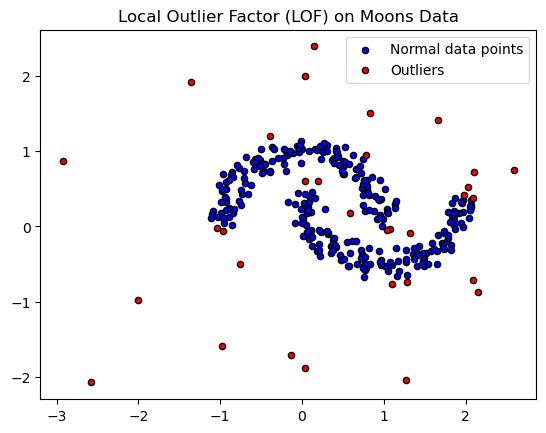

In [11]:
# Separate normal data points>>inliers and outliers 
X_inliers = X[y_pred == 1]
X_outliers = X[y_pred == -1]

# Plotting
plt.title("Local Outlier Factor (LOF) on Moons Data")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=20, edgecolor='k', label='Normal data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=20, edgecolor='k', label='Outliers')
plt.legend()
plt.show()